In [60]:
import numpy as np, sympy
import matplotlib.pyplot as plt
from scipy.special import expit

https://christophm.github.io/interpretable-ml-book/logistic.html

* Limit output of linear regression to binary domain [0,1]

Logistic regression models statistical event in terms of `Odds`.

Given probability `p` that event is true, odds are calculated as:
$$\mathrm{Odds}(p) = \frac{p}{1-p}; \ p \in  [0,1]$$
Odds shows success rate of event outcome, which is bounded between 0 and infinity.
$$\mathrm{Odds}(p) \in [0,\inf)$$

It is also possible to calculate natural log of odds (log-odds), or `logit`:
$$\mathrm{logit}(p) = \mathrm{ln}\left(\frac{p}{1-p}\right)$$
Which maps `p` domain to logit domain as
$$p\rightarrow \mathrm{logit}(p) : (0,1) \rightarrow (-\infty, \infty)$$

Which is more appropriate domain for linear regression models

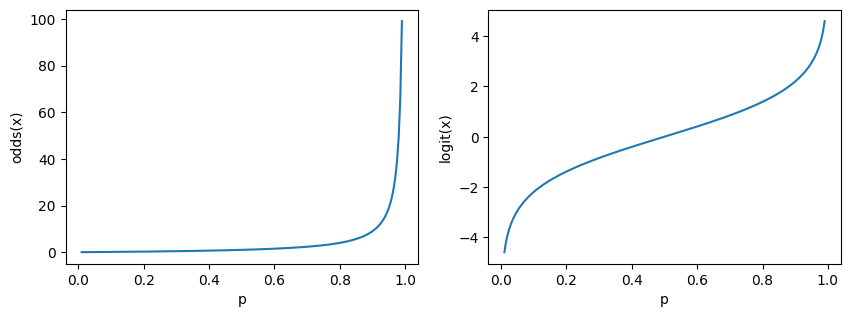

In [30]:
eps = 0.01
ps = np.linspace(eps,1-eps,200)
odds_p = ps/(1-ps)
ln_odds_p = np.log(odds_p)
fig, ax = plt.subplots(1,2, figsize = (10,3.3))
ax[0].plot(ps, odds_p);     ax[0].set_xlabel('p'); ax[0].set_ylabel('odds(x)')
ax[1].plot(ps, ln_odds_p);  ax[1].set_xlabel('p'); ax[1].set_ylabel('logit(x)');

This representation allows us to apply linear regression:
$$\mathrm{logit}(p) = \mathrm{ln}\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$$

When model parameters $\{\beta_i\}_i^n$ are estimated, we should transform a model to probability view by inverse of logit function
$$p = \mathrm{logit}^{-1}(\mathrm{logit}(p))$$

called _standard logistic/sigmoid function_ $\sigma(x)$:

$$\mathrm{logit}^{-1}(x) = \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}$$

Check:
$$p = \sigma(\mathrm{logit}(p)) = \frac{1}{1+e^{-ln(\frac{p}{1-p})}}=
\frac{1}{1+e^{ln(\frac{1-p}{p})}} = 
\frac{1}{1+\frac{1-p}{p}}=
\frac{p}{p+1-p}= p$$



For our linear model we come to (same) following expression:
$$e^{\mathrm{ln}\left(\frac{p}{1-p}\right)} = \frac{p}{1-p} = e^{(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)} = e^a$$
$$p = (1-p)e^{a} = e^{a} - p e^{a}$$
$$p(1+e^{a}) = e^{a} $$
$$p = \frac{e^{a}}{1+e^{a}} = \frac{1}{1+e^{-a}} = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}$$

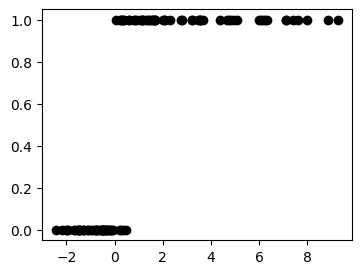

In [32]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
# X_test = np.linspace(-5, 10, 300)

# loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
# plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

# ols = LinearRegression()
# ols.fit(X, y)
# plt.plot(
#     X_test,
#     ols.coef_ * X_test + ols.intercept_,
#     label="Linear Regression Model",
#     linewidth=1,
# )
# plt.axhline(0.5, color=".5")

# plt.ylabel("y")
# plt.xlabel("X")
# plt.xticks(range(-5, 10))
# plt.yticks([0, 0.5, 1])
# plt.ylim(-0.25, 1.25)
# plt.xlim(-4, 10)
# plt.legend(
#     loc="lower right",
#     fontsize="small",
# )
# plt.tight_layout()
# plt.show()

In [79]:
feats = np.array([X,np.ones_like(X)]).reshape(2,-1).T
print(f'{feats.shape = }; {feats[0] = }')

feats.shape = (100, 2); feats[0] = array([7.62115459, 1.        ])


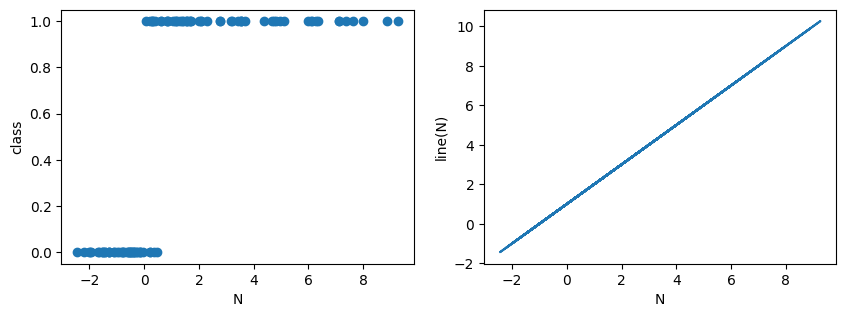

In [56]:
line_params = np.array([[1,1]]).T
# def line(features, params):
#     return features @ params

# yy = line(feats, line_params)

fig, ax = plt.subplots(1,2, figsize = (10,3.3))
ax[0].scatter(feats[:,0], y);     ax[0].set_xlabel('N'); ax[0].set_ylabel('class')
ax[1].plot(feats[:,0], yy);  ax[1].set_xlabel('N'); ax[1].set_ylabel('line(N)');

-41.32258154394085

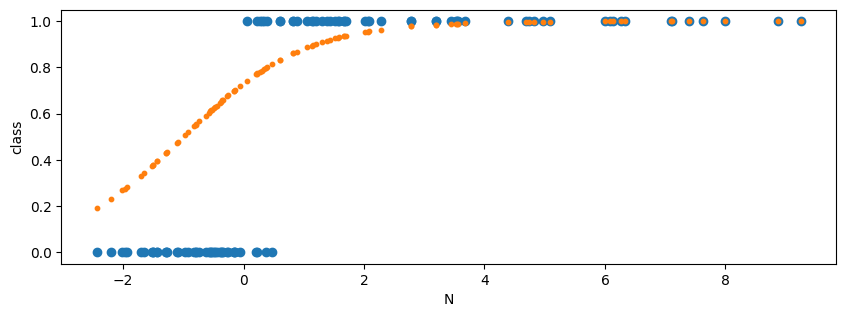

In [71]:
prob_1 = y == 1

yy_sig = expit(yy)

prob_1_sub = np.log(yy_sig[prob_1])         # log probs of cases 1
prob_2_sub = np.log(1 - yy_sig[~prob_1])    # log probs of cases 0

log_likelihood = np.sum(prob_1_sub) + np.sum(prob_2_sub) 


fig, ax = plt.subplots(1,1, figsize = (10,3.3))
ax = [ax]
ax[0].scatter(feats[:,0], y);     ax[0].set_xlabel('N'); ax[0].set_ylabel('class')
ax[0].scatter(feats[:,0], yy_sig, s = 10);
log_likelihood


(array([17, 18, 19], dtype=int64), array([2, 2, 1], dtype=int64))

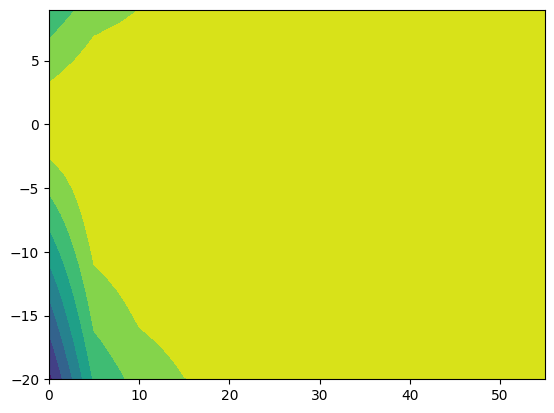

In [139]:
def calc_likelihood(features, b1, b0, mask):
    line_params = np.array([[b1,b0]]).T
    #print(f'{features.shape = }; {line_params.shape = }')
    line = features @ line_params
    y = expit(line)
    prob_1_sub = np.log(y[mask])         # log probs of cases 1
    prob_2_sub = np.log(1 - y[~mask])    # log probs of cases 0

    log_likelihood = np.sum(prob_1_sub) + np.sum(prob_2_sub) 

    return log_likelihood

#calc_likelihood2 = np.vectorize(calc_likelihood, excluded=['features', 'mask'])

XX,YY = np.meshgrid(np.arange(0, 60, 5),np.arange(-20, 10, 1))
ZZ = np.zeros_like(XX)
for (i,j),x in np.ndenumerate(XX):
    ZZ[i,j] = calc_likelihood(feats, x, YY[i,j], prob_1)
plt.contourf(XX,YY,ZZ)
np.where(ZZ == np.max(ZZ))


In [125]:
a = np.array([[1, 2], [3, 4]])
for (i,j), x in np.ndenumerate(a):
    print((i,j),x)
    1#print(i,j, x)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


<span style='color:Yellow'> Blue is my favorite color.  </span>

<div class="alert-success">
$latex($$a - 5 $$)
</div>